<a href="https://colab.research.google.com/github/abdulxs/Eye-Tracking-Projects/blob/main/Gaze%20Simulator/Gaze_data_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source code

About: A gaze data simulator with configurable parameters such as duration, sampling rate, fixation and saccade characteristics, display resolution, distance to the screen, and display size. Generated gaze data can be exported and visualized

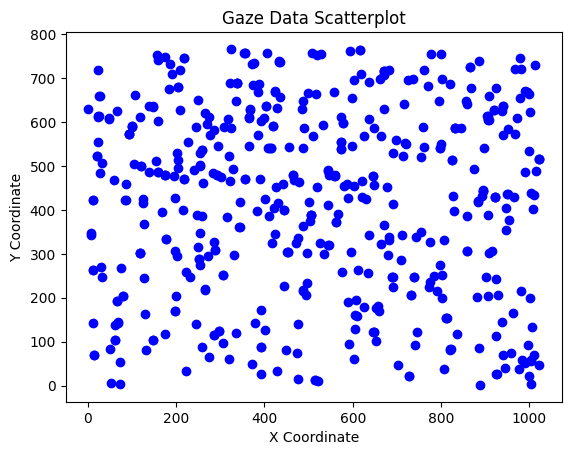

In [ ]:
import csv
import random
import math
import matplotlib.pyplot as plt


def generate_gaze_data(duration, sampling_rate, fixation_duration_range, saccade_duration_range,
                       saccade_velocity_range, resolution, distance_to_screen, display_size):
    num_samples = duration * sampling_rate
    x_resolution, y_resolution = resolution
    x_size, y_size = display_size
    visual_angle_per_pixel = math.degrees(2 * math.atan((x_size / 2) / distance_to_screen)) / x_resolution

    data = []

    for _ in range(num_samples):
        if random.random() < 0.8:  # 80% chance of fixation
            duration = random.uniform(*fixation_duration_range)
            data.append([random.uniform(0, x_resolution), random.uniform(0, y_resolution), duration])
        else:  # 20% chance of saccade
            duration = random.uniform(*saccade_duration_range)
            velocity = random.uniform(*saccade_velocity_range)
            start_x, start_y = data[-1][:2]  # End of the last fixation
            angle = random.uniform(0, 2 * math.pi)
            end_x = start_x + velocity * duration * math.cos(angle) * visual_angle_per_pixel
            end_y = start_y + velocity * duration * math.sin(angle) * visual_angle_per_pixel
            data.append([end_x, end_y, duration])

    return data

def save_to_csv(data, filename='gaze_data.csv'):
    with open(filename, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(['X', 'Y', 'Duration'])
        csvwriter.writerows(data)

# Set parameters
duration = 10  # seconds
sampling_rate = 50  # Hz
fixation_duration_range = (0.1, 0.25)  # seconds
saccade_duration_range = (0.02, 0.05)  # seconds
saccade_velocity_range = (300, 500)  # degrees per second
resolution = (1024, 768)  # pixels
distance_to_screen = 60  # cm
display_size = (53.34, 40.0)  # cm (21 inch)

# Generate gaze data
gaze_data = generate_gaze_data(duration, sampling_rate, fixation_duration_range, saccade_duration_range,
                                saccade_velocity_range, resolution, distance_to_screen, display_size)

# Save to CSV
save_to_csv(gaze_data)

#plot a scatterplot for the gaze data
def plot_gaze_data(data):
    x_values = [sample[0] for sample in data]
    y_values = [sample[1] for sample in data]

    plt.scatter(x_values, y_values, c='blue', marker='o')
    plt.title('Gaze Data Scatterplot')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

plot_gaze_data(gaze_data)
